# <span style = "color:blue;"> **Bellabeat Case Study Capstone Project** </span>

This case study is an optional capstone project provided by the [Google Data Analytics Certificate](https://www.coursera.org/professional-certificates/google-data-analytics?utm_source=google&utm_medium=institutions&utm_campaign=gwgsite-gDigital-paidha-can-sem-bk-data-exa-glp-br-keyword&_ga=2.235806081.1296031072.1678731191-112389825.1677624861&_gac=1.26604623.1678731192.Cj0KCQjwk7ugBhDIARIsAGuvgPb0_gq_iBlcruk8k3sHUKVeBoFriH6obOqUiYmVW4LnKpPlpQEy_joaAgfCEALw_wcB), which consists of 8-courses that provided me with the necessary skills needed to flouish as a data analyst. In this course, I learnt both hard skills working with Microsoft Excel, SQL, Tableau, and R programming, as well as soft skills including problem solving, critical thinking, and presentation skills. This capstone project helped consolidate what I've learnt and visits each phase of data analysis in-depth.

## <div style = "color:blue;" > Case Study Introduction </div>

Bellabeat is a health-product manufacturer catered towards women and are looking to become a larger player in the smart device market. Their products provide the user insights on their activity, sleep, stress, menstrual cycle, and mindfulness habits through the Bellabeat app.

As part of the Bellabeat marketing analytics team, we were tasked to analyze smart device data to potentially unlock growth opportunities for the company. We were asked to focus on one of Bellabeat's products and provide high-level recommendations to guide Bellabeat's marketing strategies.

## <div style = "color:blue;" > Ask Phase </div>

In the ask phase, there are two main goals; that is, to identify the problem that needs solving, as well as fully understanding the shareholder's expectations. The problem can be defined by looking at the ideal state, and compare how it differs from the current situation. In this case, although Bellabeat is a successful small company, they wish to become a larger contributor and competitor in the global market. The shareholders wish for the Bellabeat Marketing Analysis Team to analyze the smart device data to provide high-level insights for their marketing strategy to achieve this.

## <div style = "color:blue;" > The Prepare Phase </div>

The prepare phase follows the ask phase, and is where data analysts collect and store data for future use. [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) (CC0:Public Domain by Mobius) is used for our analysis and contains fitness information from 30 consenting users.

The data contains various metrics such as, but not limited to the total steps taken in a day or hour, calories burnt in a day, sleep per night. Although the dataset provided consists of 18 CSV-files, many files are subsets of larger files that provide redundant information. Similarly, some files contain metrics gathered from a limited sample size and will not be included in our analysis.

Bellabeat's cofounder and chief creative officer informs us that there are limitations to the provided dataset. These limitations should be addressed in case they negatively influence the reliability and validity of our findings:
1. Small sample size: The sample size should be representative of the whole population which is unlikely considering that the target population is women across the globe.
2. Lack of demographics: Demographics are a major health determinant which is needed in order to select an appropriate sample size. [Biobehavioral, behavioral, and social factors](https://www.ncbi.nlm.nih.gov/books/NBK43745/) are all variables that influence an individual's health and lifestyle.
3. Short data collection duration: Data was collected over one month and may not be representative of an individual's actual lifestyle. For example, a user based in Toronto may be less inclinded to be active in the harsh, cold winter compared to a user in California.

Considering the limitations, the data can still provide valueable insights to improve Bellabeat's marketing strategies.

## <div style = "color:blue;" > The Process Phase </div>

This phase requires us to find and remove and errors or inconsistencies that may impede the analysis step. Here, we can remove any missing points, typos, nulls, or outliers to ensure we are working with clean data. The process phase also includes the transformation of data into a more useful format. Data cleaning, transformation, analysis, and visualization will all be performed in R Studio.

In [1]:
library(janitor)
library(dplyr)
library(lubridate)
library(tidyverse)
library(ggplot2)
library(ggpubr)
library(formattable)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ stringr 1.5.0
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.3     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()            

In [2]:
activity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
steps <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
sleep <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or 

The clean_names function from the janitor package changes all column names in a dataframe resulting in unique names in the snake_case format. 

In [3]:
activity <- clean_names(activity)
steps <- clean_names(steps)
sleep <- clean_names(sleep)

The remove_empty function removes all rows and/or columns that consist *entirely* of "NA" values.

Next, the is.na function checks each cell for "NA" and returns FALSE if that cell is not a "NA". The sum function then obtains the total number of "FALSE". There are no "NA" values in our datasets.

In [4]:
# removing empty columns and rows
activity <- activity %>% 
  remove_empty(whic=c("rows", "cols"))
steps <- steps %>% 
  remove_empty(whic=c("rows", "cols"))
sleep <- sleep %>% 
  remove_empty(whic=c("rows", "cols"))

# checking for nulls
sum(is.na(activity))
sum(is.na(steps))
sum(is.na(sleep))

[1] 0

[1] 0

[1] 0

We then check for duplicates with the get_dupes function and remove and duplicated values if they exist. Three duplicates were found in the sleep table and removed.

In [5]:
# finding dupes
get_dupes(activity)
get_dupes(sleep)
get_dupes(steps)

No variable names specified - using all columns.


No duplicate combinations found of: id, activity_date, total_steps, total_distance, tracker_distance, logged_activities_distance, very_active_distance, moderately_active_distance, light_active_distance, ... and 6 other variables



id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,dupe_count
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>


No variable names specified - using all columns.




id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,dupe_count
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>
4388161847,5/5/2016 12:00:00 AM,1,471,495,2
4388161847,5/5/2016 12:00:00 AM,1,471,495,2
4702921684,5/7/2016 12:00:00 AM,1,520,543,2
4702921684,5/7/2016 12:00:00 AM,1,520,543,2
8378563200,4/25/2016 12:00:00 AM,1,388,402,2
8378563200,4/25/2016 12:00:00 AM,1,388,402,2


No variable names specified - using all columns.


No duplicate combinations found of: id, activity_hour, step_total



id,activity_hour,step_total,dupe_count
<dbl>,<chr>,<dbl>,<int>


In [6]:
sleep <- sleep[!duplicated(sleep), ]

Although the names were cleaned, we want to align variables across different dataframes if we want to merge/join our tables in the future. The column for dates are named differently across the dataframes so they will all be named "date" for consistency. 

Dates in the *sleep* table are in the datetime format and is converted to a date format. All the times in *sleep* are "12:00:00 AM" which signals the start of the day and is irrelevant. Time in *steps* are useful and are renamed as "date_time".

In [7]:
# aligning date format for future joining
  # removed time from sleep table since all times listed as 12:00:00 AM
  # renamed date columns as "date", and the column with date and time as "date_time"
activity <- activity %>% 
  rename(date = activity_date) %>% 
  mutate(date = lubridate::mdy(date))
steps <- steps %>% 
  rename(date_time = activity_hour) %>% 
  mutate(date_time = lubridate::mdy_hms(date_time)) 
sleep <- sleep %>% 
  rename(date = sleep_day) %>% 
  mutate(date = as.Date(date, format = '%m/%d/%Y %H:%M:%S %p')) 

During the data cleaning process, a few data points seemed suspicious. For example, some users had days where they were sedentary for 1440 minutes (24-hours) or totaled zero steps which may be attributed to the FitBit not being used. These extreme data points can influence the analysis are should be removed.

Logically speaking, most people would take at least 100-steps per day even if they are mostly sedentary. Any less than that may mean that the FitBit wasn't used or the battery died early so any data points with less than 100-steps were removed.

Likewise, sedentary time exceeding 23-hours or under 3-hours were removed. Users are considered sedentary when sleeping so any less than 3-hours of sedentary time seems unlikely. Sedentary time at the high-end of the spectrum may be plausible since user could be working an office/desk job at home so I was a bit more conservative in removing these values. Still, 24-hours of sedentary time likely indicates that the FitBit wasn't used.

Furthermore, some values of calories burnt were "0". Since calories burnt vary drastically, only data points where calories burnt equal to "0" were removed. [Calories are burnt just from sitting](https://pubmed.ncbi.nlm.nih.gov/26693809/) due to the muscles needed to keep one upright.

The subset function creates a new dataframe called "activity_cleaned" which includes all specified values. Essentially, the arbitrary outliers were excluded from the new dataframe.

In [8]:
activity_cleaned <- activity %>% 
  subset(total_steps > 100) %>% 
  subset(sedentary_minutes < 1380 & sedentary_minutes > 180) %>% 
  subset(calories != 0)

Data points outside the upper and lower limit (fences) of a data set are considered outliers by definition. Outliers will be identified and then deleted if they do not make logical sense.

The interquartile range (IQR) is a measure of statistical dispersion that indicates the middle 50% of data, or the difference between the 75th and 25th percentiles. The upper fence represents values exceeding the 75th percentile by more than 1.5-times the difference between the percentiles. The same logic can be applied to the lower fence.

The summary function can easily help us identify the different percentiles (quartiles) to find our upper and lower fences. All outliers are listed in a different table for us to evaluate using the subset function again.

In [9]:
# calorie outliers
summary(activity_cleaned$calories)
IQR_calories = 2846 - 1878
upfen_calories = 2846 + 1.5 * IQR_calories
lowfen_calories = 1878 - 1.5 * IQR_calories
activity_cleaned_calories_outliers <- subset(activity_cleaned, activity_cleaned$calories > upfen_calories | 
                                             activity_cleaned$calories < lowfen_calories)
# sedentary outliers
summary(activity_cleaned$sedentary_minutes)
IQR_sedentary_minutes = 1172 - 720
upfen_sedentary_minutes = 1172 + 1.5 * IQR_sedentary_minutes
lowfen_sedentary_minutes = 720 - 1.5 * IQR_sedentary_minutes
# upper fence exceeds 24h so not included
activity_cleaned_sedentary_outliers <- subset(activity_cleaned, activity_cleaned$sedentary_minutes < lowfen_sedentary_minutes)

# total steps outliers
summary(activity_cleaned$total_steps)
IQR_total_steps = 11196 - 5206
upfen_total_steps = 11196 + 1.5 * IQR_total_steps
lowfen_total_steps = 5206 - 1.5 * IQR_total_steps
# lower fence is negative so used arbitrary value of anything <200 to check
activity_cleaned_steps_outlier <- subset(activity_cleaned, activity_cleaned$total_steps > upfen_total_steps | activity_cleaned$total_steps < 200)

# outliers from sleep and steps
summary(sleep$total_minutes_asleep)
summary(steps$step_total)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    741    1878    2241    2389    2846    4900 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  218.0   720.0   986.0   941.5  1172.0  1377.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    152    5206    8240    8627   11196   36019 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   58.0   361.0   432.5   419.2   490.0   796.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0    40.0   320.2   357.0 10554.0 

Not many outliers were expected since most of the illogical data were removed beforehand. 
1. Outliers for calories burnt were high but the *total_steps* and amount of activity were just as high so no data points were removed.
2. No outliers were found for sedentary minutes.
3. One outlier was removed from row 137 since high calories were burnt, but the total amount of steps and activity were too low to make sense.
4. The lowest amount of sleep was 58-minutes while the highest amount of sleep was 796. While unhealthy, both may be possible so no outliers were removed. The same logic is applied to total steps taken.

Finally, all the dataframes have been cleaned and are ready for use. The *activity_cleaned* and *sleep* tables are then joined to find any existing correlations.

In [10]:
activity_cleaned <- activity_cleaned[-137, ]

cleaned_activity_sleep <- merge(activity_cleaned, sleep, by = c("id", "date"))

## <div style = "color:blue;" > The Analyze and Share Phase </div>

Using the clean and processed data, we can create visualization that help us understand possible trends. Analysis helps with making predictions, drawing conclusions, and in return, drives informed decision making.

Variables in the cleaned activity table are plotted against each other to find trends.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


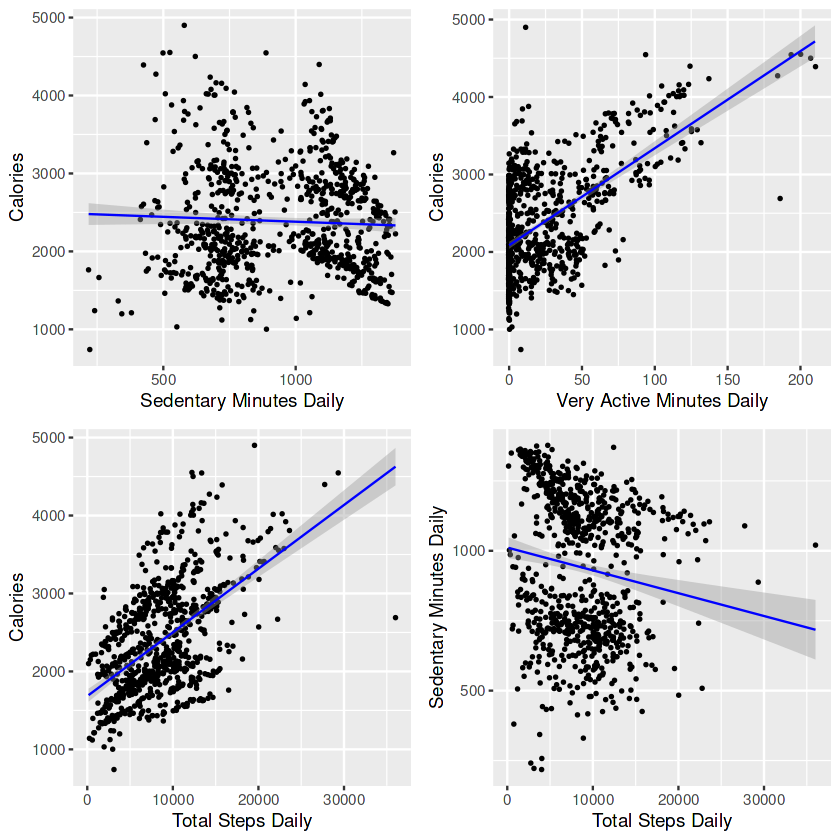

In [11]:
ggpubr::ggarrange(
  ggplot2::ggplot(activity_cleaned, aes(x = sedentary_minutes, y = calories)) +
    geom_jitter(size = 0.5) + 
    geom_smooth(lwd = 0.5, color = "blue", method = "lm") +
    labs(x = "Sedentary Minutes Daily", y = "Calories"),
  ggplot2::ggplot(activity_cleaned, aes(x = very_active_minutes, y = calories)) +
    geom_jitter(size = 0.5) + 
    geom_smooth(lwd = 0.5, color = "blue", method = "lm") +
    labs(x = "Very Active Minutes Daily", y = "Calories"),
  ggplot2::ggplot(activity_cleaned, aes(x = total_steps, y = calories)) +
    geom_jitter(size = 0.5) + 
    geom_smooth(lwd = 0.5, color = "blue", method = "lm") +
    labs(x = "Total Steps Daily", y = "Calories"),
  ggplot2::ggplot(activity_cleaned, aes(x = total_steps, y = sedentary_minutes)) +
    geom_jitter(size = 0.5) + 
    geom_smooth(lwd = 0.5, color = "blue", method = "lm") +
    labs(x = "Total Steps Daily", y = "Sedentary Minutes Daily")
)

As expected, there is a positive correlation between calories, total steps, and very active minutes. The more steps and active minutes an individual has, the more calories they burn in a day. There is also a negative correlation between sedentary minutes and total steps in a day. The less sedentary time a user has, the more time there is for to be active. However, there is no correlation between calories burnt and sedentary minutes. Applying the same thought process, it would be reasonable for calories burnt and sedentary minutes to have a negative correlation.

The same trends are seen both before and after removing the outliers but stronger correlations are seen after removing the outliers. The same graphs plotted before removing the outliers can be seen as follows: 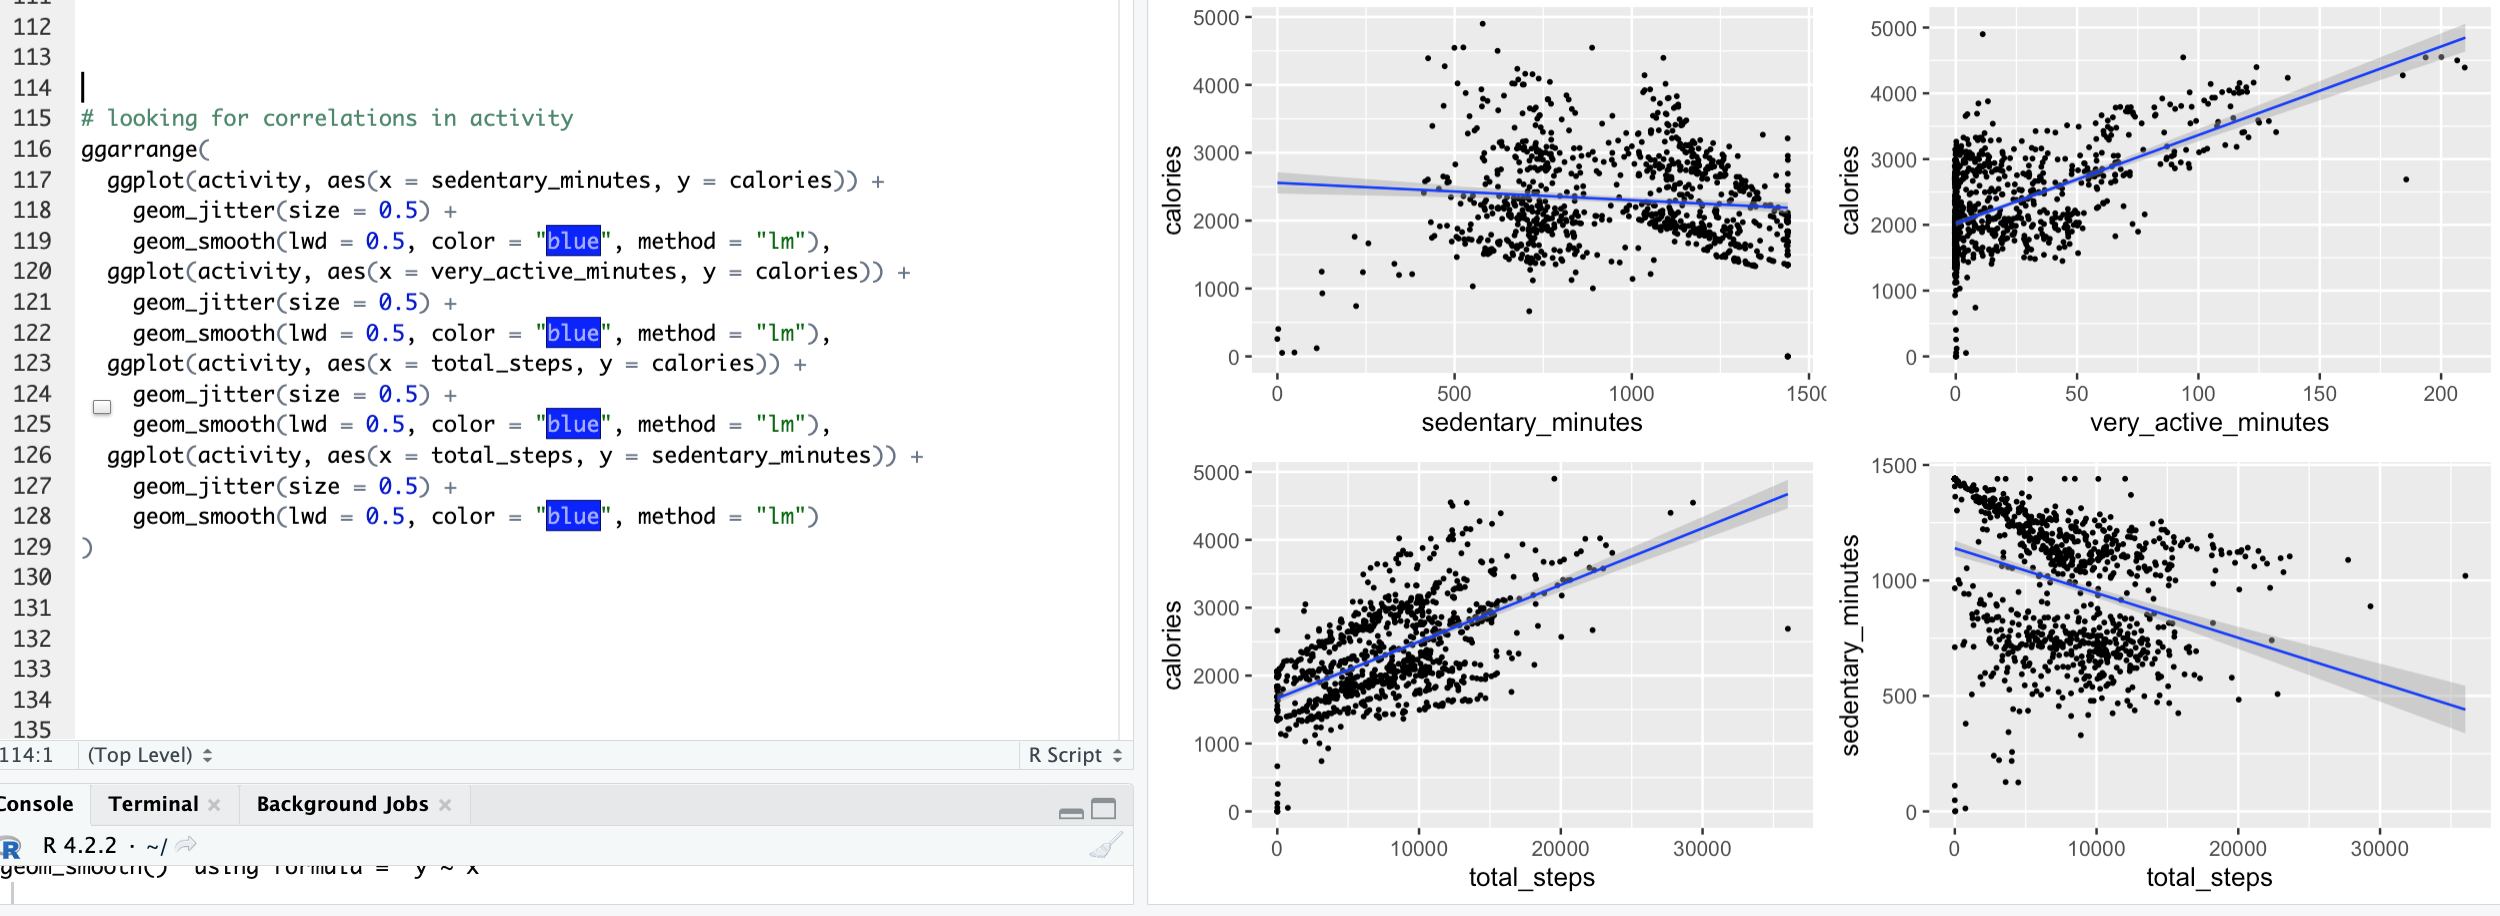

Now, trends within the merged datasets of cleaned activity and sleep are investigated. First, a new column called *day* is created, while the day of the week corresponding to the date is added using the "weekday" function. A new table is created afterwards which gets the average amount of steps taken per day of the week. The seven days of the week are plotted against the average steps per day of the week and the line at the y-intercept indicates the [recommended amount of steps per day](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3169444/#:~:text=Normative%20data%20indicates%20that%201,1%2C200%2D8%2C800%20steps%2Fday.). 

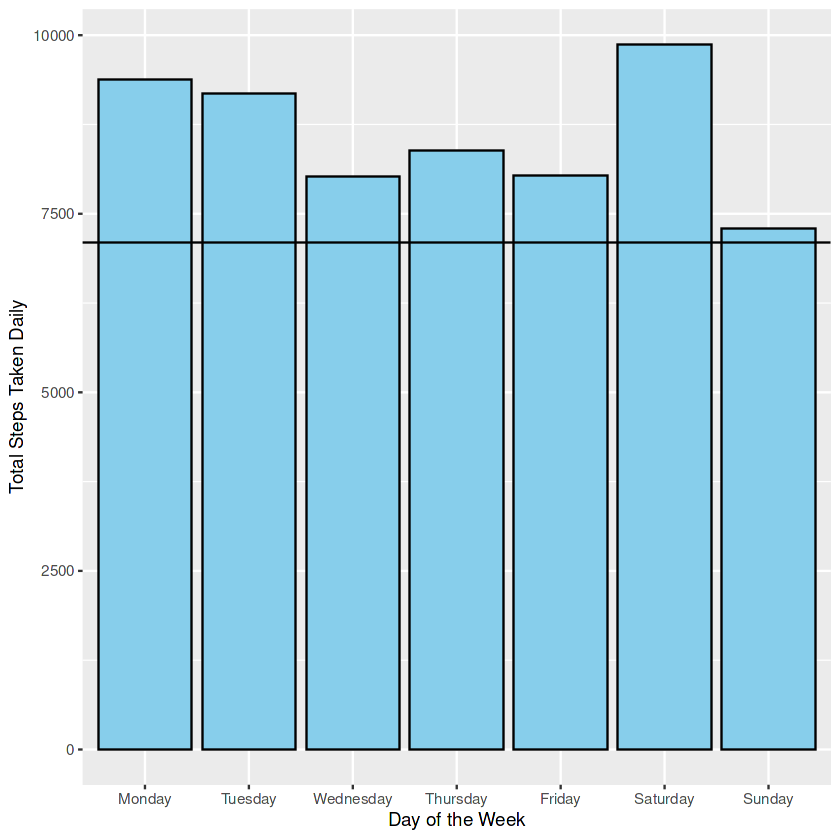

In [12]:
# adding column for days of the week
cleaned_activity_sleep$day <- weekdays(as.Date(cleaned_activity_sleep$date))

# getting average steps per day of the week
cleaned_steps_per_day_of_week <- cleaned_activity_sleep 
cleaned_steps_per_day_of_week$day <- ordered(cleaned_steps_per_day_of_week$day, 
                                     levels = c("Monday", "Tuesday", "Wednesday", 
                                                "Thursday", "Friday", "Saturday", "Sunday")) 
cleaned_steps_per_day_of_week <- cleaned_steps_per_day_of_week %>% 
  group_by(day) %>% 
  summarize(mean_steps_day = mean(total_steps))

# plotting days of week against steps per day
ggplot(data = cleaned_steps_per_day_of_week, aes(x = day, y = mean_steps_day)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  geom_hline(yintercept = 7100) +
  labs(x = "Day of the Week", y = "Total Steps Taken Daily")

On average, users meet the recommended amount of steps per day to improve functional and cognitive health. However, the recommended steps per day vary drastically between demographics such as in older or diseased populations. Such metadata are important information that should be included in future sessions to improve the analysis.

Users tend to have the most amount of steps on Saturday, which could be due to working professionals having a day off from work. On the other hand, users barely reach the 7100 step threshold on Sundays as they are potentially getting ready for the work week to start on Monday. Knowing if the user is a student, working professional, or retired for example, can be important as it allows Bellabeat to cater services to each group depending on their needs.

Similarly, using the *day* column created earlier from the weekday function, days of the week can be graphed against the average amount of sleep between all users. [Adults should have 7-hours of sleep or more every night](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4434546/#:~:text=Adults%20should%20sleep%207%20or,and%20increased%20risk%20of%20death.) as sleep is one the the major contributors to a healthy lifestyle. Thus, the line indicates the minimum recommended amount of sleep users should strive for.

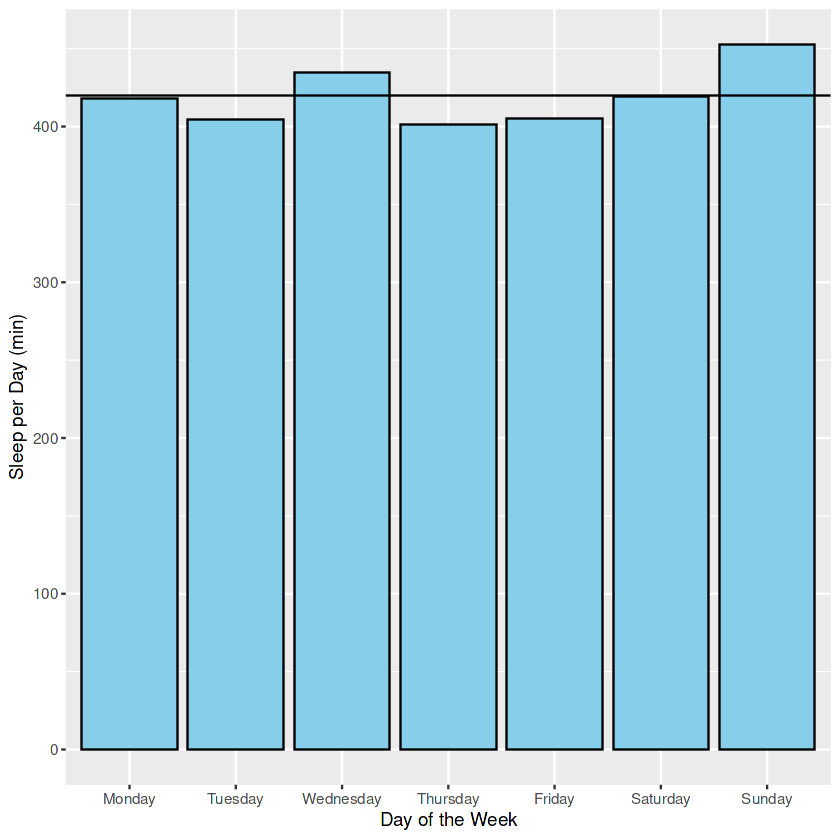

In [13]:
# getting average minutes asleep per day
cleaned_sleep_per_day_of_week <- cleaned_activity_sleep
cleaned_sleep_per_day_of_week$day <- ordered(cleaned_sleep_per_day_of_week$day, 
                                     levels = c("Monday", "Tuesday", "Wednesday", 
                                                "Thursday", "Friday", "Saturday", "Sunday")) 
cleaned_sleep_per_day_of_week <- cleaned_sleep_per_day_of_week %>% 
  group_by(day) %>% 
  summarize(mean_sleep = mean(total_minutes_asleep))

# plotting days of week against sleep per day
ggplot(data = cleaned_sleep_per_day_of_week, aes(x = day, y = mean_sleep)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  geom_hline(yintercept = 420) +
  labs(x = "Day of the Week", y = "Sleep per Day (min)")


It seems as if most users are barely getting the minimum recommended amount of sleep per day from Monday to Saturday. In contrast, users get an average of 7.5-hours (453 minutes) on Sunday. From the preceding graph, users just barely maintained an average above the recommended 7100 steps on Sunday. The increase of sleep on Sundays are consistent with the decrease in steps and may have highlighted an important trend in consumers where Sundays may be considered a "rest day".

A trend in our sample may exist since users can be more or less active depending on the day of the week. There may also be trends that happen hourly if we look at each day of the week specifically. In order to examine this hypothesis, the "separate" function was used to separate the date and time in the steps dataframe and days of the week were added like in previous examples. The data was grouped and averaged by date and time which was then made into a heat map to observe which timepoints have the most activity. 

`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.


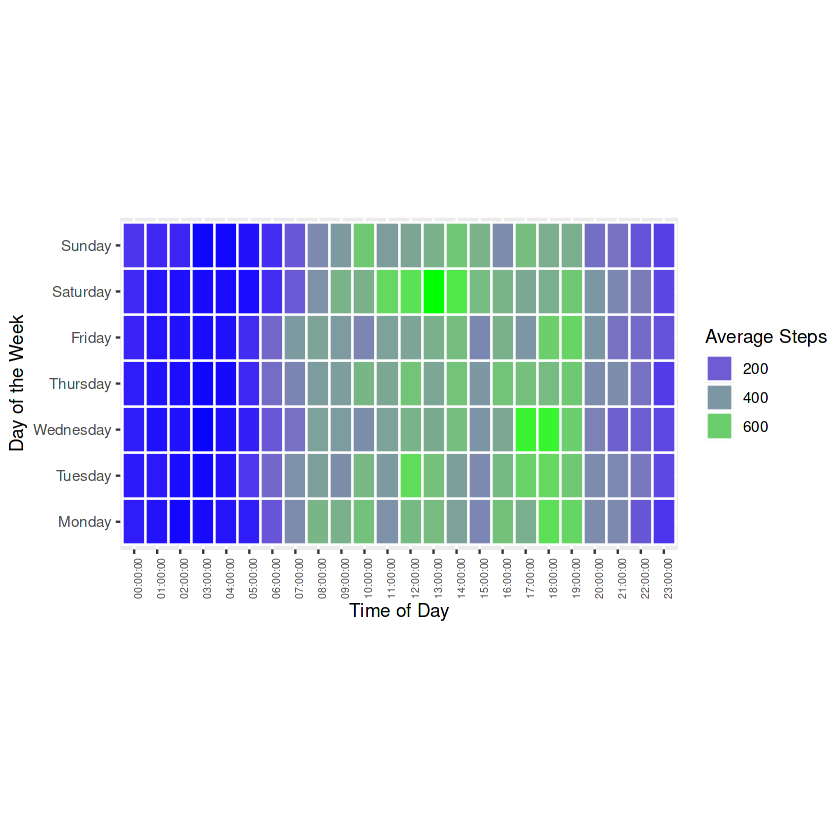

In [14]:
steps_day_time <- steps %>% 
  separate(date_time, into = c("date", "time"), sep = " ")
steps_day_time$day <- wday(steps_day_time$date, label = TRUE, abbr = FALSE, week_start = 1)

steps_day_time <- steps_day_time %>% 
  group_by(day, time) %>% 
  summarize(mean_steps_day_time = mean(step_total))

ggplot(steps_day_time, aes(x = time, y = day, fill = mean_steps_day_time)) +
  geom_tile(color = "white", lwd = 0.5) +
  scale_fill_gradient2(low = "white", mid = "blue", high = "green") +
  theme(axis.text.x = element_text(angle = 90, size = 6)) +
  coord_fixed(ratio = 2) +
  guides(fill = guide_legend(title = "Average Steps")) +
  labs(x = "Time of Day", y = "Day of the Week")

Most users are not active on any day of the week before 9:00 AM or after 8:00 PM since they are likely sleeping or just getting in/out of bed. Unfortunately, there are no obvious trends where users are active but more total steps are taken around the 4:00 PM to 7:00 PM range on weekdays. This could be due to the the majority of users being working professionals who are getting off work around that time. With a small sample size of 30-users, it is fairly easy for a few individuals that are extremely active or inactive at certain times of the week to skew the data. For example, some users could have weekly jogs on Wednesday from 5:00 PM to 7:00 PM which would increase the total steps for that time frame as seen in the heat map. By having a larger sample size and collecting important metadata to provide context, an improved heatmap could be developed to enlighten Bellabeat what time and day users are most active.

Lastly, each individual user is to be grouped by their activity level to have a better understanding of Bellabeat's consumers. Users are categorized into highly active, active, somewhat active, low active, and sedentary by the [average total steps they take daily](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3169444/#:~:text=Tudor%2DLocke%20and%20Bassett%20%5B15,and%205%20%E2%89%A512%2C500%20steps%2F).

A dataframe called *user_averages* was created by grouping and taking the average of measurements such as sleep, sedentary minutes, and total steps. After the users are group accordingly, we use the "group" and "summarise" functions to count the number of users in each activity intensity level. The *types_total* variable is the total number which is used to find the fraction, and subsequently, the percent of users in each level.

In [15]:
# getting average steps per user
user_averages <- cleaned_activity_sleep %>% 
  group_by(id) %>% 
  summarise(mean_steps = mean(total_steps), mean_sedentary_minutes = mean(sedentary_minutes),
            mean_calories = mean(calories), mean_sleep = mean(total_minutes_asleep),
            mean_bed = mean(total_time_in_bed))

# adding activity level to each user
user_averages <- user_averages %>% 
  mutate(activity_type = case_when (
    mean_steps < 5000 ~ "sedentary",
    mean_steps >= 5000 & mean_steps < 7500 ~ "low active",
    mean_steps >= 7500 & mean_steps < 10000 ~ "somewhat active",
    mean_steps >= 10000 & mean_steps < 12500 ~ "active",
    mean_steps >= 12500 ~ "highly active"
  ))

# grouping by activity level
activity_level <- user_averages %>%
  group_by(activity_type) %>% 
  summarise(activity_type_count = n())
  # getting total users
types_total = sum(activity_level$activity_type_count)
  # getting percent of activity type
activity_level <- activity_level %>%  
  mutate(activity_type_percent = activity_type_count / types_total) %>% 
  mutate(activity_type_percent = scales::percent(activity_type_percent))

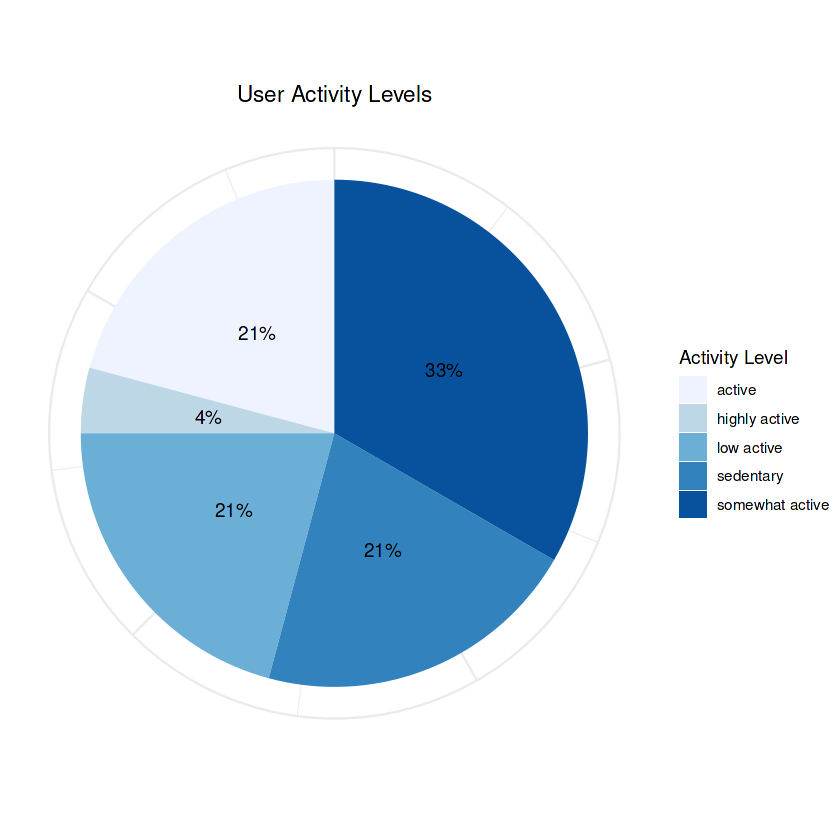

In [16]:
# plotting bar graph as a pie chart
  ggplot(data = activity_level, aes(x = "", y = activity_type_count, fill = activity_type)) +
    geom_bar(width = 1, stat = "identity") +
    coord_polar("y", start = 0) +
    scale_fill_brewer(palette = "Blues") + theme_minimal() +
    theme(axis.text.x = element_blank()) +
    theme(axis.title.x = element_blank()) + 
    theme(axis.title.y = element_blank()) +
    geom_text(aes(label = activity_type_percent), position = position_stack(vjust = 0.5)) +
    ggtitle("User Activity Levels") + theme(plot.title = element_text(hjust = 0.5)) +
    guides(fill=guide_legend(title = "Activity Level"))

Bellabeat's products seem to attract users of all fitness levels so adjustments can be in the app to encourage users to reach the next fitness level if wanted. Different recommendations could be suggested such as the recommended amount of daily calorie intake which should vary between the groups.

During data cleaning, sedentary times of 24-hours were noticed. This likely means the FitBit was not used. Similarly, some individuals had less than the 30-31 entries expected in a month. Therefore, user were also categorized into infrequent use, occasional use, moderate use, and frequent use. The categorizations are arbitrary but can give the team a general understanding of their consumer's usage.

In [17]:
# getting usage frequency
monthly_use <- activity_cleaned %>% 
  group_by(id) %>% 
  summarise(uses = sum(n())) %>% 
  mutate(monthly_use = case_when (
    uses < 8 ~ "infrequent use",
    uses >= 8 & uses < 15 ~ "occasional use",
    uses >= 15 & uses < 22 ~ "moderate use",
    uses >= 22 ~ "frequent use"
  ))

# grouping by frequency count
usage_frequency <- monthly_use %>%
  group_by(monthly_use) %>% 
  summarise(frequency_count = n())
# getting total frequency
frequency_total = sum(usage_frequency$frequency_count)
# getting percent of activity type
usage_frequency <- usage_frequency %>%  
  mutate(frequency_percent = frequency_count / frequency_total) %>% 
  mutate(frequency_percent = scales::percent(frequency_percent))

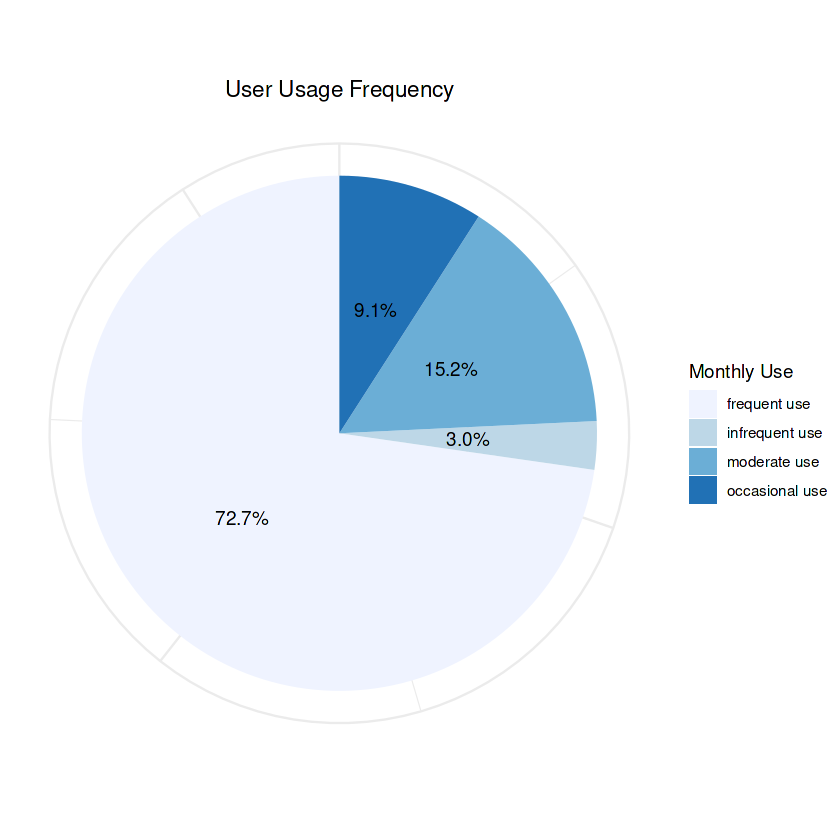

In [18]:
ggplot(data = usage_frequency, aes(x = "", y = frequency_count, fill = monthly_use)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  scale_fill_brewer(palette = "Blues") + theme_minimal() +
  theme(axis.text.x = element_blank()) +
  theme(axis.title.x = element_blank()) + 
  theme(axis.title.y = element_blank()) +
  geom_text(aes(label = frequency_percent), position = position_stack(vjust = 0.5)) +
  ggtitle("User Usage Frequency") + theme(plot.title = element_text(hjust = 0.5)) +
  guides(fill=guide_legend(title = "Monthly Use"))

Thankfully, the majority of consumers are frequent users suggesting that Bellabeat's products are useful and do not get in the way of most lifestyles. Bellabeat could introduce a survey for the less frequent users to find why they are not using Bellabeat's products consistency.

Because users only have so much time in a day, more active users may be neglecting sleep as they are hyperfixated on improving their health through exercise. However, sleep is just as important so trends between activity level and sleep are graphed as follows:

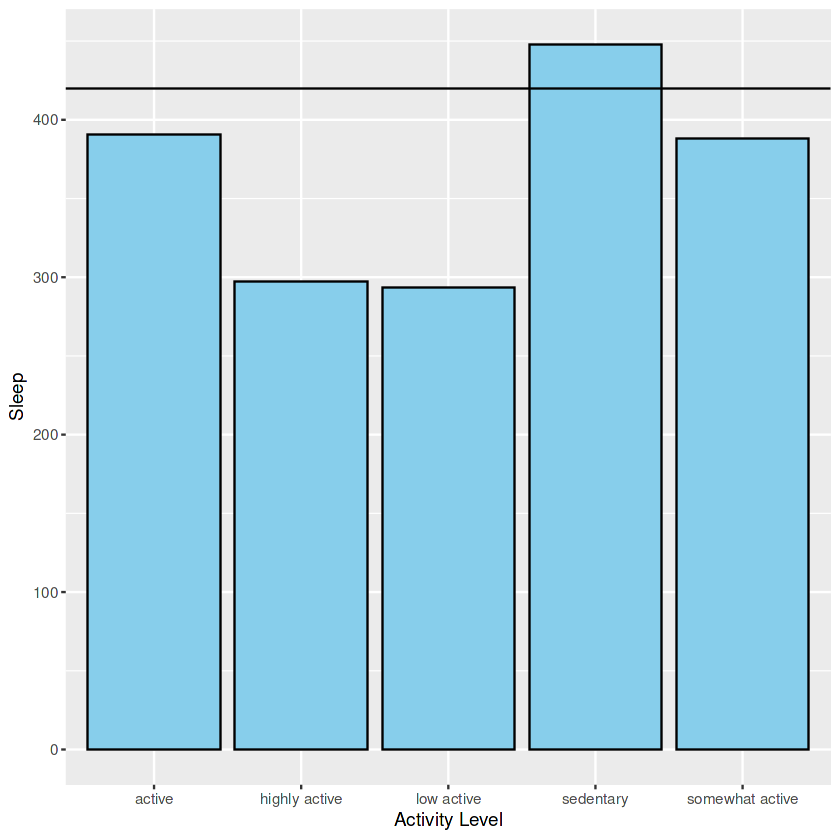

In [19]:
activity_on_sleep <- user_averages %>% 
  group_by(activity_type) %>% 
  summarise(activity_type_sleep = mean(mean_sleep)) 
ggplot(data = activity_on_sleep, aes(x = activity_type, y = activity_type_sleep)) +
    geom_bar(stat = "identity", fill = "skyblue", color = "black") +
    geom_hline(yintercept = 420) +
    labs(x = "Activity Level", y = "Sleep")

As expected, those who are too active are not getting the minimum recommended amount of sleep per night (7 hours/420 minutes). Conversely, those who are considered sedentary are getting more sleep. However, users should strive for a healthy balance between sleep and activity level since only sedentary users seem to be getting enough sleep nightly.

Most users are frequent users as seen previously, so it can be assumed that frequent users have a similar distribution of activity intensity levels. This can be confirmed by simply merging two dataframes created just prior. Only the activeness of frequent users were investigated as the other user frequencies have too small of a sample size.

In [20]:
# finding use frequency and activity level correlations
  # merge activity level and use frequency by id
activity_use_corr <- merge(user_averages, monthly_use, by = c("id"))
activity_use_corr <- activity_use_corr %>% 
  group_by(monthly_use, activity_type) %>% 
  summarise(count = n())
  # only keeping frequent users as other activity types lack data
activity_use_corr <- activity_use_corr[-c(6, 7, 8, 9),] 
  # finding percent
total = sum(activity_use_corr$count)
activity_use_corr <- activity_use_corr %>% 
  mutate(percent = count / total) %>% 
  mutate(percent = scales::percent(percent))

`summarise()` has grouped output by 'monthly_use'. You can override using the
`.groups` argument.


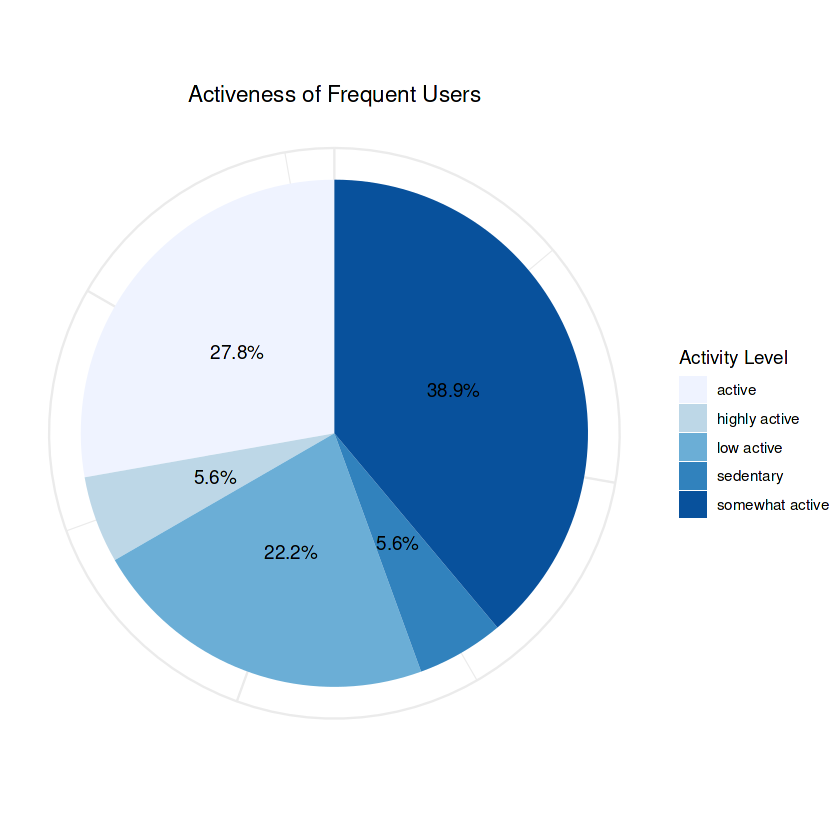

In [21]:
ggplot(data = activity_use_corr, aes(x = "", y = count, fill = activity_type)) + 
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  scale_fill_brewer(palette = "Blues") + theme_minimal() +
  theme(axis.text.x = element_blank()) +
  theme(axis.title.x = element_blank()) + 
  theme(axis.title.y = element_blank()) +
  geom_text(aes(label = percent), position = position_stack(vjust = 0.5)) +
  ggtitle("Activeness of Frequent Users") + theme(plot.title = element_text(hjust = 0.5)) +
  guides(fill=guide_legend(title = "Activity Level"))

Surprisingly, the amount of sedentary users went down by a lot and the two categories at the extremes sides of the spectrum make up less than 10% of frequent users. The Bellabeat app seems to be effective in reducing sedentary users when used frequently.

## <div style = "color:blue" > The Act Phase - Insights and Recommendations </div>

The act phase is where the Bellabeat market analyst team should provide possible solutions for the business problem at hand. The shareholders wish to push Bellabeat to the global market, so the team should provide data-driven insights to help achieve this.

Since the stakeholders requested the Bellabeat marketing analysis team to suggest improvements for one product specifically, the team decided that improving the app would be the wisest decision. The Bellabeat app connects to their whole line of products and is likely used by the most consumers.

### Trends in Data and Why it Matters
1. Product utilization rate

From the 'User Usage Frequency' Chart, it appears as if a little over 85% of users regularly use their Bellabeat products. Regular users consists of both frequent and moderate users in the 'User Usage Frequency' Chart. In other words, consumers are using their Bellabeat productAlthough 87% sounds relatively high, when put into perspective, 150,000 out of 1,000,000 users would rarely be actively using their Bellabeat product after purchase. This is especially relevant since Bellabeat wishes to expand and be a strong player in the smart technology global market. Bellabeat should consider ways to improve user retention especially since word-of-mouth advertising is so important in today's society.

In order to resolve the problems Bellabeat consumers may have that lead to less often use, the problems first have to be identified. Bellabeat could send out surveys on the Bellabeat app to identify common complaints a user may have. Unfortunately, [survey response rates range from 15-30%](https://peoplepulse.com/resources/useful-articles/survey-response-rates/) depending on the length and complexity of questions asked. Response rates from customers that are already rarely using their products are expected to be even lower Therefore, it is imperative that Bellabeat should offer a small incentive to participate in the survey while keeping the survey at a tolerable length. For example, the survey should consist mainly of short and easy to answer, closed-ended questions that are convenient for the consumer to answer, and for the data analytics team to process. A small discount, voucher, or token of appreciation could be provided as well and may result in an increased profit as well as giving the customers an incentive to participate in the survey. From this survey, important demographic and context details could also be gathered to make more informed decisions.


2. Activeness of Frequent Users

This section investigates how active users are when they are frequent users of Bellabeat products. Ideally, all frequency groups would be analyzed, but the lack of data and samples meant that some categories had either no users, or very few users. Including these frequency groups would have been misleading since it is highly unlikely that there are no active users in the moderate use category when looking at the target population. Similarly, frequency groups with a few users would skew the data heavily as well.

Nevertheless, having this visualization allows the Bellabeat marketing analysis team to have a general idea regarding the activeness of their frequent users. The survey mentioned early could include a section that inquires their user as to why they use Bellabeat products. Although the products are targeted towards the more active population, around 30% of frequent users are considered low active or sedentary. Perhaps, these users like Bellabeat products for their design, aesthetics, quality, or ease-of-use. Finding the general consensus may allow for Bellabeat to open a new product line that targets the less active population. This allows for a larger target audience and would be a great way for Bellabeat to enter the global market.

However, for more active users, their main goal is likely to stay fit and improve their health and lifestyle through Bellabeat's help. The app can introduce push notifications that notify and encourage the user to achieve the minimum 7100 steps daily to stay fit. In addition, the app can also provide the benefits to doing so such as improving cardiovascular health, easing joint and muscle pain, lowering mortality rate, and can improve mental health. Similar to targeted products for the less active group, products such as their water bottle (Spring) could be recommended to encourage users to stay hydrated. All these claims should be endorsed by researchers and Bellabeat could look into partnering with physiologists or kinesiologists since studies have found that [scientists are one of the most trusted groups in society](https://www.pewresearch.org/science/2020/09/29/scientists-are-among-the-most-trusted-groups-in-society-though-many-value-practical-experience-over-expertise/).

Bellabeat could introduce a reward system that encourages users to use their products frequently and stay healthy simultaneously. For example, if users are consecutively active on their app and achieve the minimum steps per day for a "streak" of one month, a small discount can be applied on their next purchase of a Bellabeat product. Regardless of how it is done, it is important to help users meet their fitness goals. By doing so, Bellabeat's customers could recommend the product to family and friends and would be a huge first step into becoming a larger player in the global smart device market.

3. User Metrics - Trends

Total steps daily and very active minutes daily have a positive correlation with the daily calories burnt as expected. However, there is no negative correlation between sedentary minutes and calories burnt. This means that individuals may still burn high amounts of calories regardless of their daily sedentary minutes. However, sedentary minutes has a slight negative correlation with total steps daily meaning that the more sedentary minutes spent daily increases the liklihood of that user taking less total steps. Thus, decreasing sedentary minutes could help to increase the chance of a user meeting the minimum amount of steps suggested in a day.

High sedentary minutes are historically associated with [numerous health deficits](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3419586/) such as cardiovascular disease, type 2 diabetes, various cancers, and obesity. Reducing sedentary minutes would serve to prevent and lower these risks while allowing for users to meet the recommended daily steps. The Bellabeat app could introduce a feature to encourage users to move around if prolonged sedentary behavior is observed outside of working hours. Over the years, sedentary behavior has only increased due to more work-from-home jobs and increased screentime and technology usage. Decreasing sedentary minutes would be a great start for users to improve fitness while decreasing disease risks.

Users seem to meet the recommended step quota on average all days of the week which may be attributed to the successful workings of Bellabeat's products. They also tend to have higher total steps on Monday, Tuesdays, and Saturdays. It might be possible that users lose motivation near the middle of the week but start exercising more frequently when they have time on Saturday. Of all days, Sundays are the day where Bellabeat consumers have a lot lower total step count than the rest of the week. The Bellabeat app could motivate users to keep up and maintain their physical activity throughout the week. However, taking a rest on Sundays may be a good idea as long as users maintain their daily step count.

Looking into each hour of the day, there isn't a clear or obvious trend as to when the sample population are more active. Rather than pooling the whole sample, it may be beneficial to consider the demographics of each individual such as if they are currently working or in school. After sorting individuals by their demographics, there may be a clearer trend to provide insight on consumer tendencies. From the heat map currently, users are on average the most active on Wednesdays from 4:00 PM to 6:00 PM. Since the sample size is small, it could be influenced by a few individuals who happen to have their weekly run at that time. Having a larger sample size with important metadata and demographics would allow for targeted responses to each individual.

Finally, sleep is one of the main determinants of health and should be prioritized equally to exercise. However, users are barely able to get the recommended 7-hours of sleep each night. The Bellabeat app could remind users to sleep within the next hour in order to get sufficient sleep and should they get at least 7-8 hours of sleep daily for a month, a discount or alternative form of incentive could be provided. The data provided suggests that users are able to get more sleep on Sundays which aligns with the data found in steps taken per day of the week. Users take noticably less steps on Sundays while getting more sleep. Sunday could be considered a rest day where the Bellabeat app could applaud the user for their hard work during the week and suggest healthy methods such as meditation or light yoga as a break. 

After noticing a trend between exercise and sleep in the two different visuals, a new graph was made to better understand the relationship between activity and sleep. Using the activity level category labels from before, each activity level was sorted to show the amount of sleep each group averaged. Although the sample population is not the largest, highly active and low active groups averaged around 5-hours of sleep nightly. For highly active groups, studies have shown that [intense exercise before bedtime is correlated with disrupted sleep](https://pubmed.ncbi.nlm.nih.gov/34416428/). The Bellabeat app could suggest users stray from intense exercise at night to promote better sleep. As for the low active group, [29 out of 33 studies](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5385214/) found a correlation between regular exercise and improved sleep quality/duration. Bellabeat can encourage this group to increase their exercise frequency to hopefully improve their sleep. In contrast, the least active user are getting the most sleep since sleep counts as sedentary hours.

### Increase the Bellabeat App/Product Usage
1. Bellabeat could introduce a socialization platform similar to popular social media such as Instagram for users to share their physical feats and acheivements with their social circle. This would greatly increase app usage and encourage friends and family to start using Bellabeat products as well. Similarly, users can keep each other in check to make sure they are reaching their fitness goals.
2. Users can also be introduced to other consumers with similar fitness goals and lifestyles through the app. For example, the app could introduce users who all play badminton casually to each other to form a weekly group. This would allow for consistent exercise and may also attract new users as well.
3. The app can include locations of healthy eating restaurants, gyms, physicians, etc., that other Bellabeat users recommend. It can also provide resources such as fitness classes, drop-in sports, or cooking classes to promote a healthy lifestyle.
4. A minigame could be introduced for those who like video games. Each step, could equate to in-game currency which users can use to buy new characters, accessories, or upgrades. Since the gaming community is also often the most sedentary, promoting exercise through an alternative gaming method would be great for motivating these users.
5. Increase the battery life and make the FitBit waterproof so users don't need to take it off. Improve the aesthetics of their other products to attract new users. This would increase app usage as all their products are connected to their app so the consistency and reliability of data collected would improve overall.


### Conclusion and Key Takeaways
1. Improve data gathering and increase sample size so individualized recommendations can be made to each individual
2. Include a short questionnaire/survey for individuals that are less frequent users of their Bellabeat product to increase user retention
3. Add incentives for the user stay health and to use Bellabeat products daily such as small discounts or freebies
4. Partner with researchers and scientists that advocate for a healthy lifestyle to increase trust and confidence in Bellabeat's products
5. Open a new product line targeting less active individuals - a sizeable portion of active users (30%) are low active or sedentary users suggesting that they may be using Bellabeat products for design, quality, or ease-of-use
6. Add features to the Bellabeat app that would encourage users to use it more frequently

#### <div style = "color:blue" > Thank you for reading to the end of my first project in R </div>

I would appreciate any comments or suggestions. Once again, thank you for the read and have a great rest of the day!